# Representing data expressed by 17-dimensional variables in two dimensions (dimensionality reduction)

Energy and Ta-Si internuclear distance (R1 to R17) data for 95 structural isomers (EQ0 to EQ94) of the TaSi17 cluster are summarized in a csv file.

Let's reduce the cluster structure information expressed by 17-dimensional variables to two dimensions using "Principal Component Analysis (PCA)" and plot the 95 pieces of data on a two-dimensional plane.

You can get the TaSi17.csv file [here](https://github.com/hatanaka-lab/Getting_started_with_MI/blob/main/data/TaSi17.csv).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 3.9 MB/s eta 0:00:004.0 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=1cc2f023158f5e89b6095decf5396b8e632564fafbc34bcbeaf59e2645cffb6e
  Stored in directory: /home/stephy/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## STEP1: Load data


In [3]:
df = pd.read_csv('TaSi17.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EQ_ID   95 non-null     object 
 1   Energy  95 non-null     float64
 2   R1      95 non-null     float64
 3   R2      95 non-null     float64
 4   R3      95 non-null     float64
 5   R4      95 non-null     float64
 6   R5      95 non-null     float64
 7   R6      95 non-null     float64
 8   R7      95 non-null     float64
 9   R8      95 non-null     float64
 10  R9      95 non-null     float64
 11  R10     95 non-null     float64
 12  R11     95 non-null     float64
 13  R12     95 non-null     float64
 14  R13     95 non-null     float64
 15  R14     95 non-null     float64
 16  R15     95 non-null     float64
 17  R16     95 non-null     float64
 18  R17     95 non-null     float64
dtypes: float64(18), object(1)
memory usage: 14.2+ KB


In [5]:
df.head()

,EQ_ID,Energy,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,EQ0,-1.492153,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.48710,2.48712
1,EQ1,-1.485933,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.35960,2.35962
2,EQ2,-1.479658,1.99645,1.99647,2.05223,2.05227,2.05629,2.06886,2.06898,2.08557,2.08559,2.10080,2.17116,2.17191,2.17200,2.40545,2.41195,2.41196,2.61329
3,EQ3,-1.461869,2.06172,2.06174,2.07154,2.09176,2.09177,2.11258,2.11259,2.12170,2.13359,2.13360,2.14793,2.14797,2.15725,2.15725,2.16666,2.36348,2.73118
4,EQ4,-1.460591,2.00505,2.00617,2.03903,2.07711,2.07954,2.08109,2.08558,2.10753,2.10794,2.12946,2.13505,2.17115,2.23491,2.27819,2.31977,2.37671,2.46514


In [6]:
df.tail()

,EQ_ID,Energy,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
90,EQ90,-1.323998,1.99770,2.03737,2.06579,2.07484,2.08240,2.08834,2.09613,2.10446,2.14385,2.14874,2.15731,2.23123,2.27344,2.29286,2.32939,3.43264,3.48057
91,EQ91,-1.323063,2.03991,2.05542,2.06959,2.07090,2.07091,2.07309,2.07677,2.07890,2.08614,2.10434,2.13951,2.14272,2.15359,2.85381,3.29702,3.34500,3.35638
92,EQ92,-1.315212,1.96057,1.96089,2.00967,2.01648,2.02520,2.02732,2.03447,2.04220,2.06905,2.08230,2.09398,2.10047,2.19170,2.20055,3.69757,3.96670,5.28407
93,EQ93,-1.311627,1.98654,2.00951,2.04003,2.05473,2.05621,2.05629,2.05664,2.05780,2.06006,2.08754,2.10033,2.11852,2.17282,2.17851,2.19746,3.29151,3.83838
94,EQ94,-1.294555,1.97714,1.99179,2.01451,2.03077,2.03193,2.03504,2.04934,2.05109,2.05119,2.06220,2.09857,2.10385,2.11911,2.97355,3.15072,3.28612,3.88658


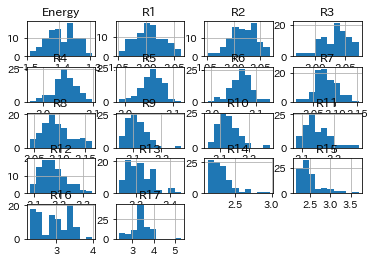

In [8]:
df.hist();

## STEP2: Delete unnecessary data

- I want to use only columns "R1" to "R17" in df as explanatory variables (input)
- In other words, just delete the "EQ_ID" and "Energy" columns before assigning the df from which columns have been deleted to a different data frame (df_dist), check whether the data has been deleted correctly

In [9]:
df_dist = df.drop(['EQ_ID', 'Energy'], axis=1)

In [10]:
df_dist.head()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.48710,2.48712
1,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.35960,2.35962
2,1.99645,1.99647,2.05223,2.05227,2.05629,2.06886,2.06898,2.08557,2.08559,2.10080,2.17116,2.17191,2.17200,2.40545,2.41195,2.41196,2.61329
3,2.06172,2.06174,2.07154,2.09176,2.09177,2.11258,2.11259,2.12170,2.13359,2.13360,2.14793,2.14797,2.15725,2.15725,2.16666,2.36348,2.73118
4,2.00505,2.00617,2.03903,2.07711,2.07954,2.08109,2.08558,2.10753,2.10794,2.12946,2.13505,2.17115,2.23491,2.27819,2.31977,2.37671,2.46514


In [11]:
# Also define a data frame "df_Target" with only the "EQ_ID" column deleted (for observing data in STEP3)
df_Target = df.drop(columns='EQ_ID')
# Check if it was specified correctly
df_Target

,Energy,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,-1.492153,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.48710,2.48712
1,-1.485933,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.35960,2.35962
2,-1.479658,1.99645,1.99647,2.05223,2.05227,2.05629,2.06886,2.06898,2.08557,2.08559,2.10080,2.17116,2.17191,2.17200,2.40545,2.41195,2.41196,2.61329
3,-1.461869,2.06172,2.06174,2.07154,2.09176,2.09177,2.11258,2.11259,2.12170,2.13359,2.13360,2.14793,2.14797,2.15725,2.15725,2.16666,2.36348,2.73118
4,-1.460591,2.00505,2.00617,2.03903,2.07711,2.07954,2.08109,2.08558,2.10753,2.10794,2.12946,2.13505,2.17115,2.23491,2.27819,2.31977,2.37671,2.46514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,-1.323998,1.99770,2.03737,2.06579,2.07484,2.08240,2.08834,2.09613,2.10446,2.14385,2.14874,2.15731,2.23123,2.27344,2.29286,2.32939,3.43264,3.48057
91,-1.323063,2.03991,2.05542,2.06959,2.07090,2.07091,2.07309,2.07677,2.07890,2.08614,2.10434,2.13951,2.14272,2.15359,2.85381,3.29702,3.34500,3.35638
92,-1.315212,1.96057,1.96089,2.00967,2.01648,2.02520,2.02732,2.03447,2.04220,2.06905,2.08230,2.09398,2.10047,2.19170,2.20055,3.69757,3.96670,5.28407
93,-1.311627,1.98654,2.00951,2.04003,2.05473,2.05621,2.05629,2.05664,2.05780,2.06006,2.08754,2.10033,2.11852,2.17282,2.17851,2.19746,3.29151,3.83838


## STEP3: Observing data

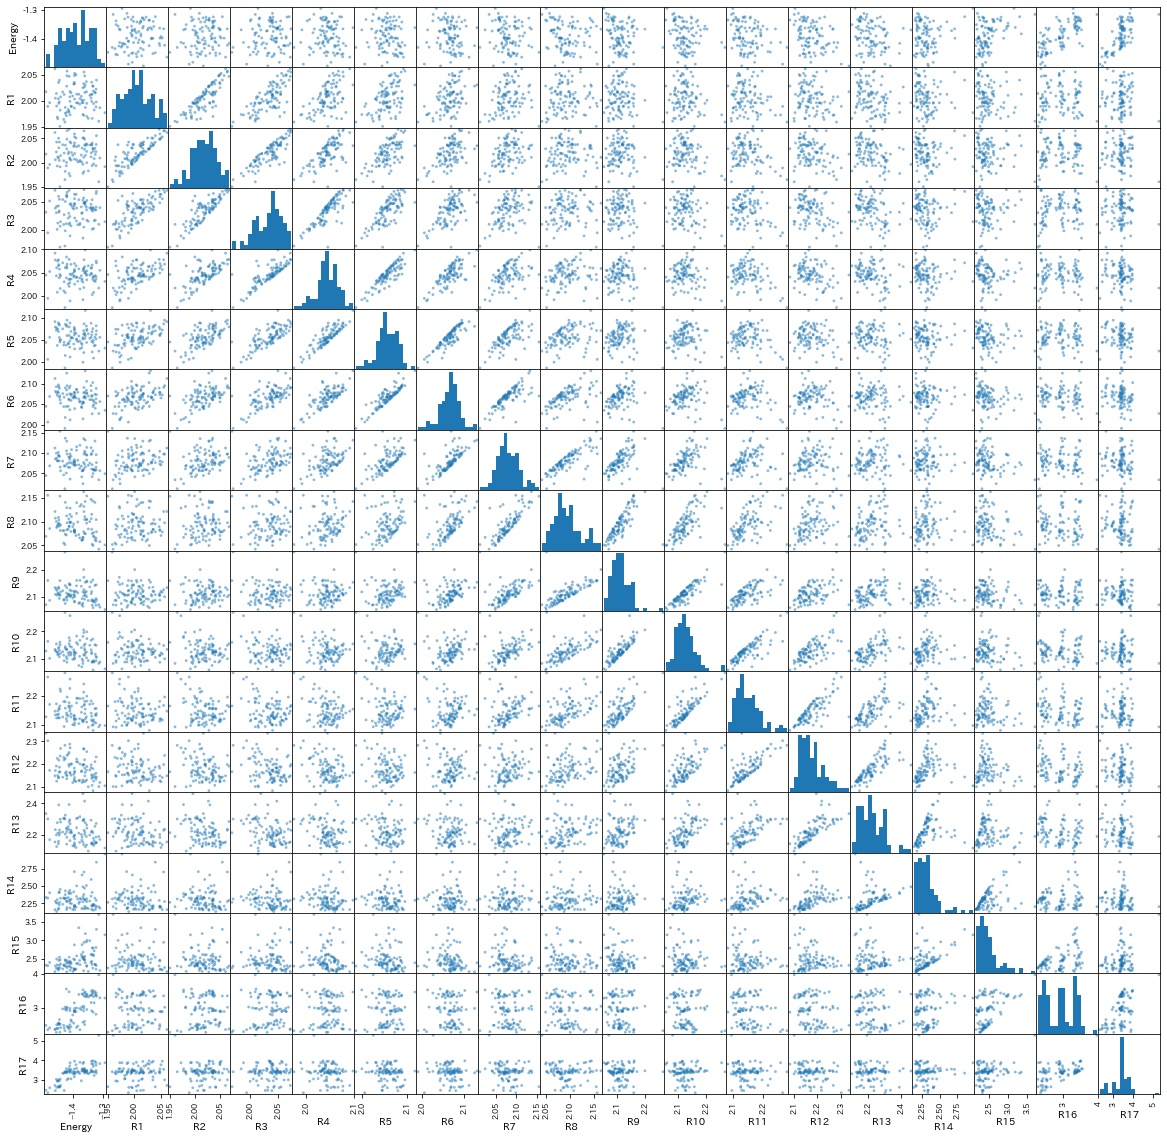

In [12]:
# Distribution
pd.plotting.scatter_matrix(df_Target, 
                           figsize=(20, 20),
                           hist_kwds={'bins':15},
                           marker=('o'), s=8, 
                           alpha=.5)
plt.show()

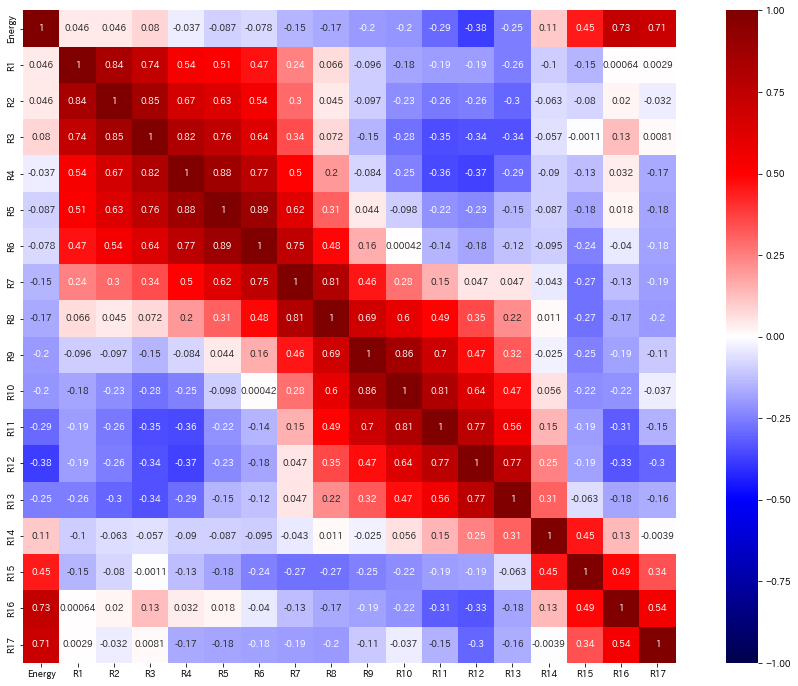

In [13]:
# Observe the data distribution: Part 2 (correlation matrix)
correlation_coefficients = df_Target.corr() # Calculate correlation matrix

# Heatmap of correlation matrix (with correlation coefficient values)
plt.rcParams['font.size'] = 9
plt.figure(figsize=(18, 12)) # Specify the image size at this stage
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

## STEP4: Dimensional compression using PCA

In [14]:
from sklearn.decomposition import PCA # Import library for PCA

# If you want to compress to k dimensions, specify n_components = k.
pca = PCA(n_components=2)
pca.fit(df_dist)

PCA(n_components=2)

In [15]:
# Calculate the contribution rate (ratio of information amount that can be expressed)
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios.rename(index={0:'1st principal component',1:'2nd principal component'}).rename(columns={0:'contribution ratio'})

,contribution ratio
1st principal component,0.626037
2nd principal component,0.188912


In [16]:
#Display the loading vector (weight of each explanatory variable for the nth principal component)
#The first principal component can be read as 0.672×R17 + 0.667×R16 + 0.312×R15 +…
loadings = pd.DataFrame(pca.components_.T, index=df_dist.columns)
loadings.rename(columns={0:'1st principal component',1:'2nd principal component'})

,1st principal component,2nd principal component
R1,-0.001049,0.006240
R2,-0.000837,-0.000841
R3,0.002909,-0.005820
R4,-0.003799,-0.010028
R5,-0.004749,-0.008687
R6,-0.006807,-0.003715
R7,-0.010022,0.001050
R8,-0.012296,0.002731
R9,-0.012298,0.014795
R10,-0.011553,0.025421


## STEP 5: Draw a scatter plot of data

Draw a scatter diagram with the horizontal axis as the first principal component axis and the vertical axis as the second principal component axis.

In [17]:
# Calculate principal component scores
# A value that represents the coordinates where each sample is located on each principal component axis
score = pd.DataFrame(pca.transform(df_dist), index=df_dist.index)

In [18]:
score

,0,1
0,-0.938564,-0.366047
1,-1.115884,-0.381078
2,-0.869114,-0.281912
3,-0.910133,-0.017615
4,-1.028516,-0.306437
...,...,...
90,0.358599,-0.118910
91,0.550599,-0.692337
92,2.363365,0.327281
93,0.469380,0.286779


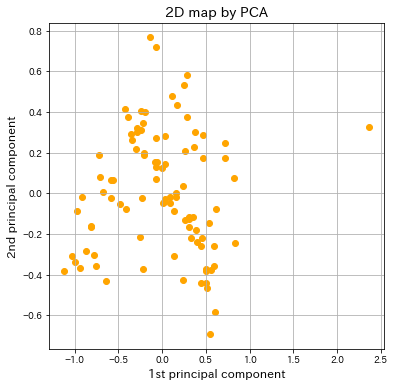

In [21]:
plt.figure(figsize=(6,6)) #Specify the figure size
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c="orange") #Specify the horizontal and vertical axes of each sample (details such as color can also be specified)
plt.title("2D map by PCA", fontsize=14) #Specify the title
plt.xlabel('1st principal component', fontsize=12) #Specify horizontal axis details
plt.ylabel('2nd principal component', fontsize=12) #Specify vertical axis details
plt.grid() #You can erase the auxiliary line by writing False in #().
plt.show()

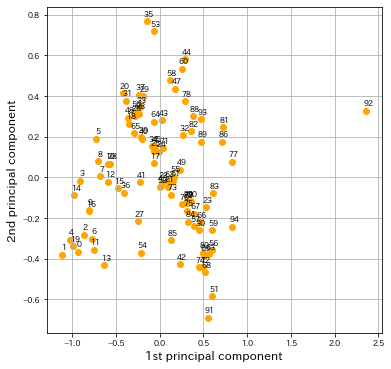

In [24]:
# Write sample name to plotted data
plt.figure(figsize=(6,6))
plt.scatter(score.iloc[:,0], score.iloc[:,1],c='orange')
plt.rcParams["font.size"] = 8
num = len(df_dist)
for i in range(num):
    plt.text(score.iloc[i,0]+0.02, score.iloc[i,1]+0.02, score.index[i], horizontalalignment="center", verticalalignment="bottom")
plt.xlabel('1st principal component', fontsize=12)
plt.ylabel('2nd principal component', fontsize=12)
plt.grid()
plt.show()

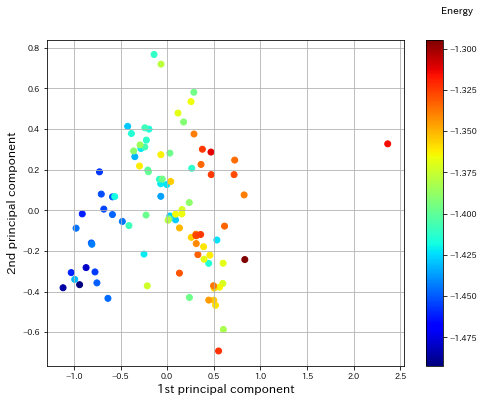

In [26]:
#Colorize according to the “Energy” value
plt.figure(figsize=(8,6))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=df['Energy'], cmap=plt.get_cmap('jet'))
clb = plt.colorbar()
clb.set_label('Energy', labelpad=-20, y=1.1, rotation=0, fontsize=10)
plt.xlabel('1st principal component', fontsize=12)
plt.ylabel('2nd principal component', fontsize=12)
plt.grid()
plt.show()